In [259]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sklearn
import math

In [260]:
df = pd.read_csv('/Users/luoyihang/dev/DS-Projects/LR Practice/Adidas US Sales Datasets.csv')

In [261]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,$50.00,"1,200","$600,000.00","$300,000.00",50%,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,$50.00,"1,000","$500,000.00","$150,000.00",30%,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,$40.00,"1,000","$400,000.00","$140,000.00",35%,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,$45.00,850,"$382,500.00","$133,875.00",35%,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,$60.00,900,"$540,000.00","$162,000.00",30%,In-store


In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   object
 1   Retailer ID       9648 non-null   int64 
 2   Invoice Date      9648 non-null   object
 3   Region            9648 non-null   object
 4   State             9648 non-null   object
 5   City              9648 non-null   object
 6   Product           9648 non-null   object
 7   Price per Unit    9648 non-null   object
 8   Units Sold        9648 non-null   object
 9   Total Sales       9648 non-null   object
 10  Operating Profit  9648 non-null   object
 11  Operating Margin  9648 non-null   object
 12  Sales Method      9648 non-null   object
dtypes: int64(1), object(12)
memory usage: 980.0+ KB


In [263]:
#Check Uniqueness 
df["Sales Method"].unique()

array(['In-store', 'Outlet', 'Online'], dtype=object)

In [264]:
df["Retailer"].unique()

array(['Foot Locker', 'Walmart', 'Sports Direct', 'West Gear', "Kohl's",
       'Amazon'], dtype=object)

In [265]:
# Cleaning the numerical columns
columns_to_clean = ["Price per Unit", "Units Sold", "Total Sales", "Operating Profit"]

for column in columns_to_clean:
    df[column] = (
        df[column]
        .astype(str)
        .str.replace("$", "")
        .str.replace(",", "")
        .astype(float)
    )
    
df["Operating Margin"] = df["Operating Margin"].astype(str).str.replace("%", "").astype(float)/100

In [266]:
# Cleaning the Date Time Variables into the right type
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])

In [267]:
# Describe the statistics of numerical variables
df.describe()

,Retailer ID,Invoice Date,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
count,9.648000e+03,9648,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,1.173850e+06,2021-05-10 15:20:44.776119296,45.216625,256.930037,93273.437500,34425.282131,0.422991
min,1.128299e+06,2020-01-01 00:00:00,7.000000,0.000000,0.000000,0.000000,0.100000
25%,1.185732e+06,2021-02-17 00:00:00,35.000000,106.000000,4254.500000,1922.000000,0.350000
50%,1.185732e+06,2021-06-04 00:00:00,45.000000,176.000000,9576.000000,4371.500000,0.410000
75%,1.185732e+06,2021-09-16 00:00:00,55.000000,350.000000,150000.000000,52063.000000,0.490000
max,1.197831e+06,2021-12-31 00:00:00,110.000000,1275.000000,825000.000000,390000.000000,0.800000
std,2.636038e+04,NaN,14.705397,214.252030,141916.016727,54193.124141,0.097197


/Users/luoyihang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/luoyihang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/luoyihang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/luoyihang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with 

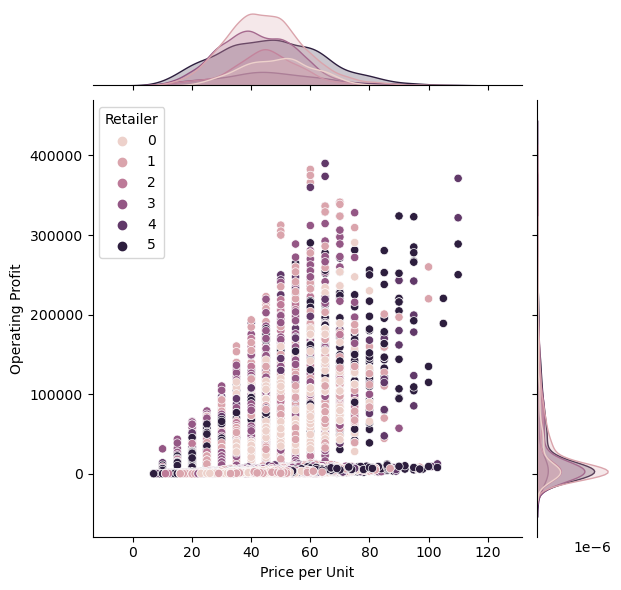

In [308]:
# EDA
sns.jointplot(x="Price per Unit", y="Operating Profit", data=df, hue="Retailer")

In [306]:
import seaborn.objects as so

/Users/luoyihang/anaconda3/lib/python3.11/site-packages/seaborn/_core/plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  for view in self._subplots:
/Users/luoyihang/anaconda3/lib/python3.11/site-packages/seaborn/_core/plot.py:1525: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  tuple[list[dict], DataFrame, dict[str, Scale]], None, None


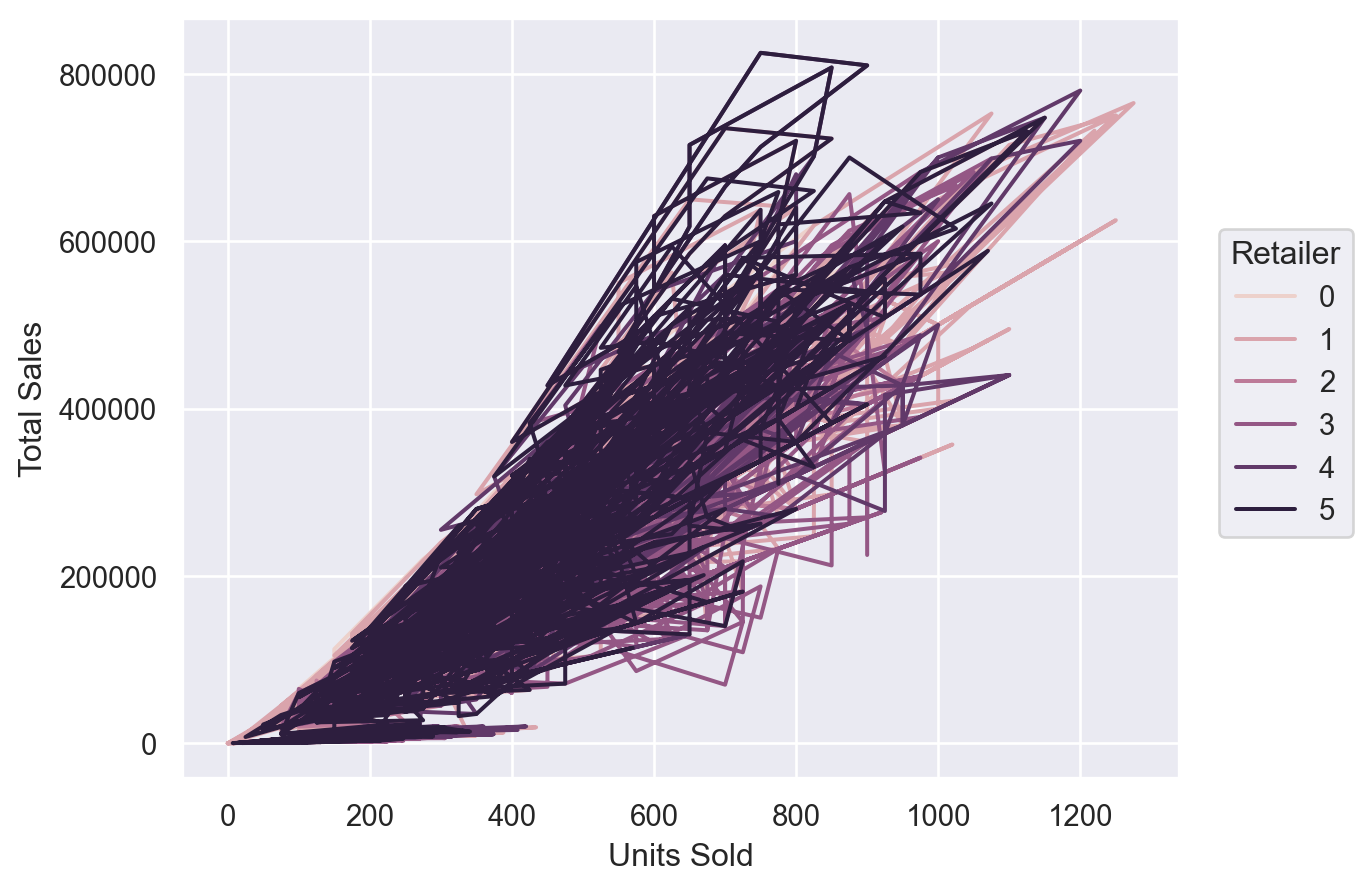

In [307]:
p = so.Plot(df, "Units Sold", "Total Sales", color="Retailer")
p.add(so.Path())

/Users/luoyihang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/luoyihang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


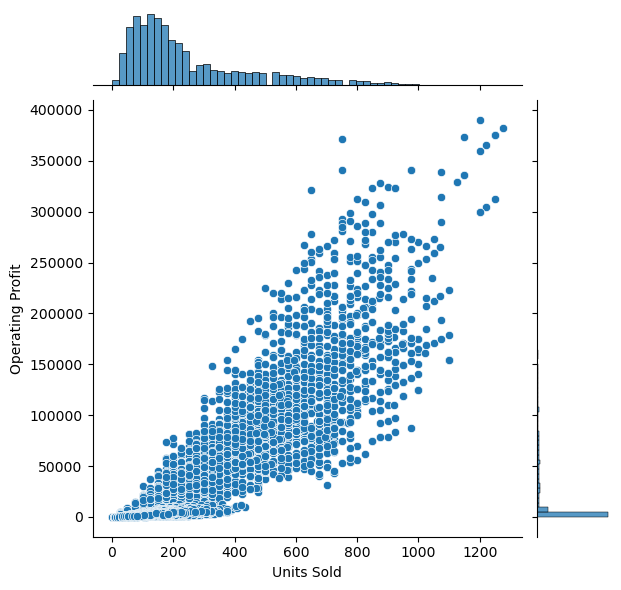

In [269]:
sns.jointplot(x="Units Sold", y="Operating Profit", data=df)

/Users/luoyihang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/luoyihang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/luoyihang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/luoyihang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

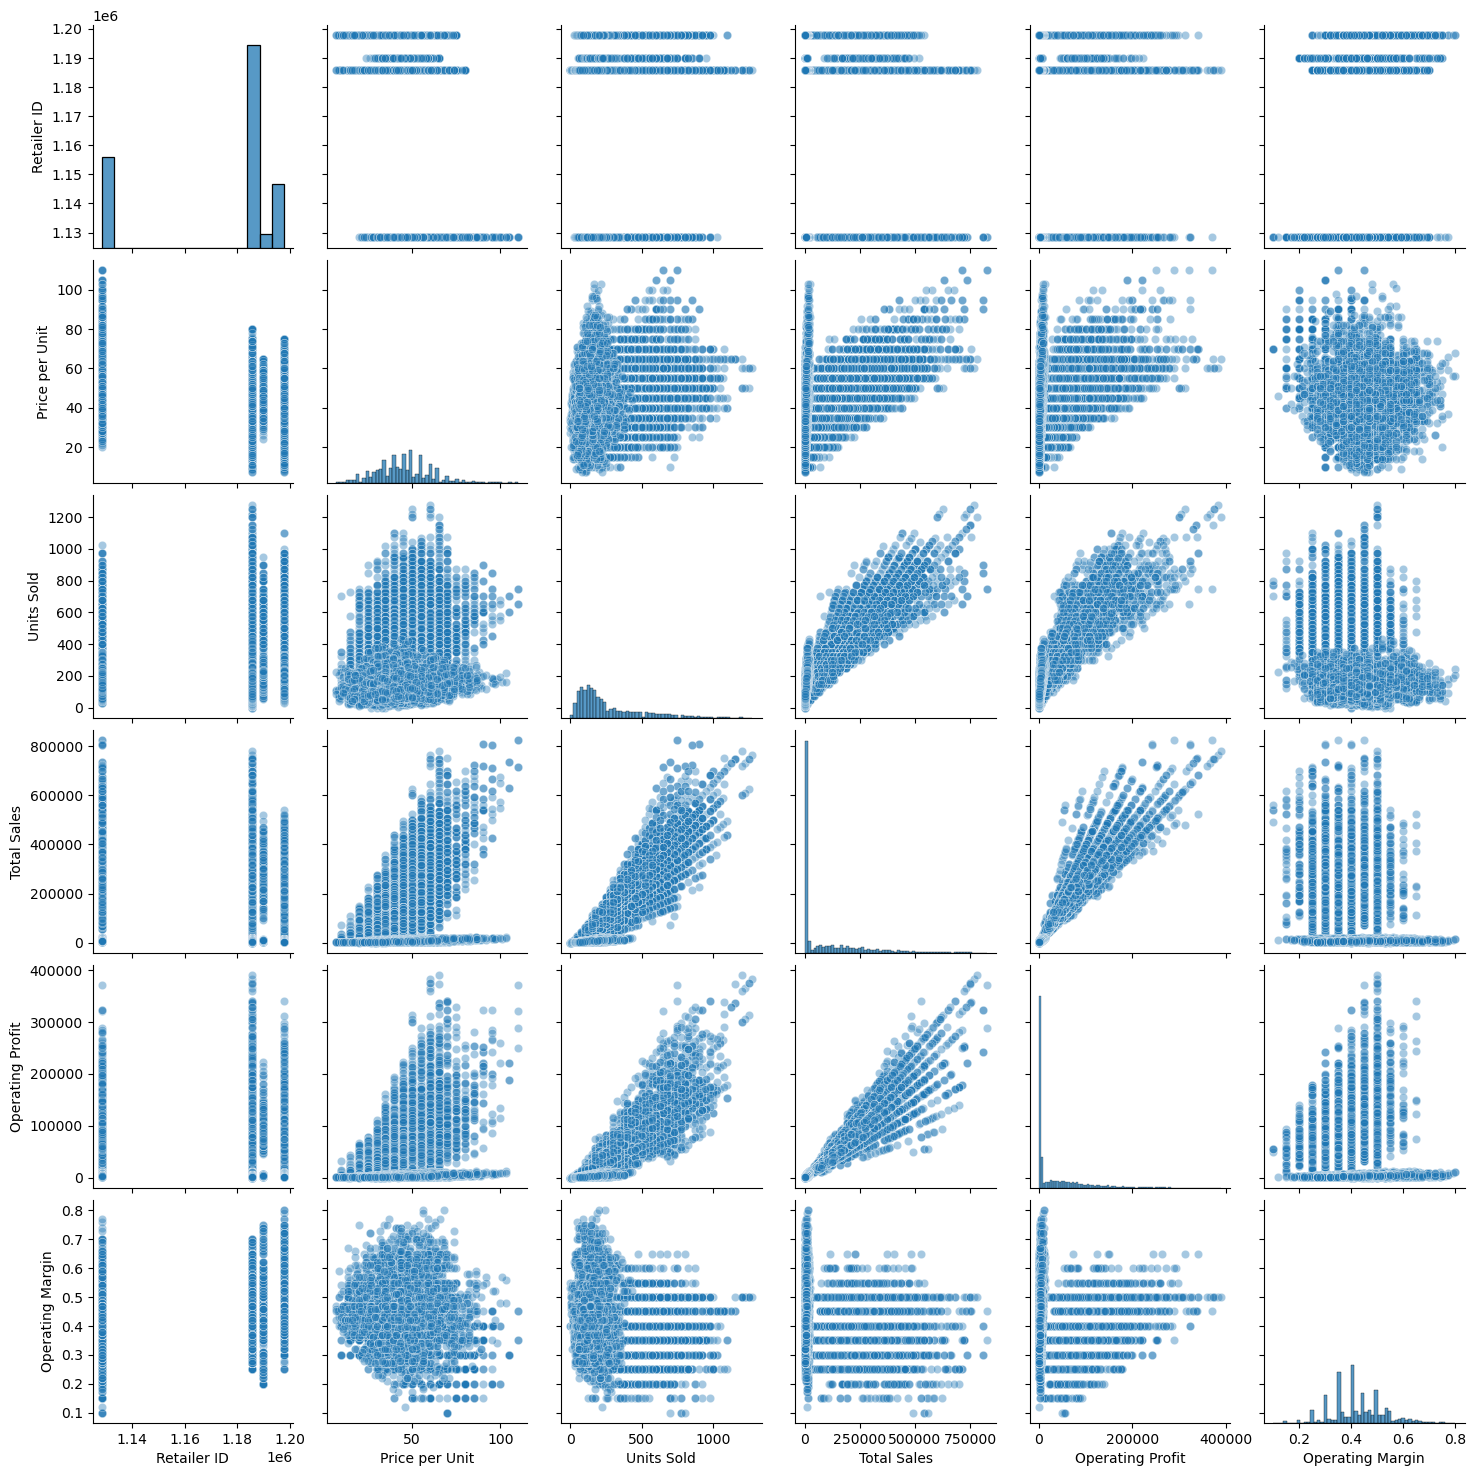

In [270]:
sns.pairplot(df, kind="scatter", plot_kws={'alpha': 0.4})

/Users/luoyihang/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


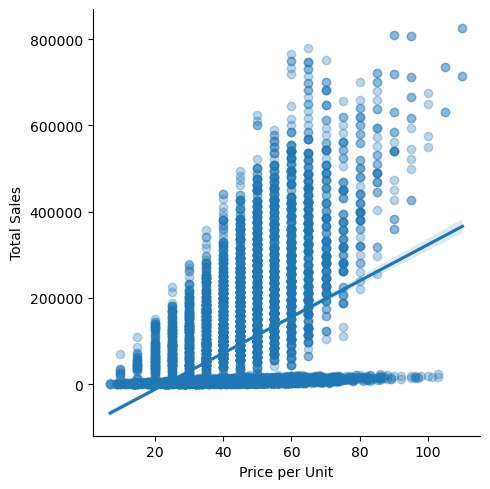

In [271]:
sns.lmplot(x="Price per Unit", y="Total Sales",
           data=df, scatter_kws={"alpha": 0.3})

In [272]:
# Linear Regression no use for id and time
df.drop("Retailer ID", axis=1, inplace=True)
df.drop("Invoice Date", axis=1, inplace=True)

In [273]:
# Label encoding
from sklearn.preprocessing import LabelEncoder
lblencoder = LabelEncoder()
for col in [0, 1, 2, 3, 4, 10]:
    df.iloc[:, col] = lblencoder.fit_transform(df.iloc[:, col])

In [274]:
from sklearn.model_selection import train_test_split

In [275]:
y = df["Total Sales"]
X = pd.DataFrame()
for c in df.columns:
    if c != "Total Sales":
        X[c] = df[c]

In [276]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [277]:
X_train

,Retailer,Region,State,City,Product,Price per Unit,Units Sold,Operating Profit,Operating Margin,Sales Method
1221,5,1,18,42,1,45.0,375.0,33750.0,0.20,2
2548,0,3,16,29,1,45.0,350.0,55125.0,0.35,1
750,5,3,8,31,0,65.0,775.0,176313.0,0.35,0
437,1,1,37,40,4,40.0,50.0,8000.0,0.40,2
5804,5,4,36,42,3,41.0,73.0,1257.0,0.42,1
...,...,...,...,...,...,...,...,...,...,...
5734,5,4,43,45,1,19.0,100.0,950.0,0.50,1
5191,1,4,10,21,0,55.0,36.0,515.0,0.26,1
5390,2,1,31,0,3,69.0,182.0,8037.0,0.64,1
860,2,0,22,33,2,35.0,475.0,74813.0,0.45,2


In [278]:
y_train

1221    168750.0
2548    157500.0
750     503750.0
437      20000.0
5804      2993.0
          ...   
5734      1900.0
5191      1980.0
5390     12558.0
860     166250.0
7270      2257.0
Name: Total Sales, Length: 6753, dtype: float64

In [279]:
y_test

2997    200000.0
7903     10019.0
4012      9024.0
2392    292500.0
3284    120000.0
          ...   
2582    211250.0
1302    151250.0
6502      4625.0
9345      7785.0
4202      6210.0
Name: Total Sales, Length: 2895, dtype: float64

In [280]:
# Train the model
from sklearn.linear_model import LinearRegression

In [281]:
lm = LinearRegression()

In [282]:
lm.fit(X_train, y_train)

LinearRegression()

In [283]:
lm.coef_

array([ 4.62536410e+02, -1.09836116e+03, -4.61679857e+01,  9.55796968e+01,
        5.17061799e+02,  8.46448984e+02,  1.69980103e+02,  1.73968522e+00,
       -1.90688486e+05, -4.22856021e+03])

In [284]:
cdf = pd.DataFrame(lm.coef_, X_train.columns, columns=['Coef'])
print(cdf)

                           Coef
Retailer             462.536410
Region             -1098.361155
State                -46.167986
City                  95.579697
Product              517.061799
Price per Unit       846.448984
Units Sold           169.980103
Operating Profit       1.739685
Operating Margin -190688.485657
Sales Method       -4228.560206


In [285]:
# Prediction
predictions = lm.predict(X_test)
predictions

array([203247.53439434,  10535.61666484,  23695.94274384, ...,
        -2307.17720404,  21853.97860011,  -3913.4698457 ])

Text(0.5, 1.0, 'Adidas Sales Prediction Model')

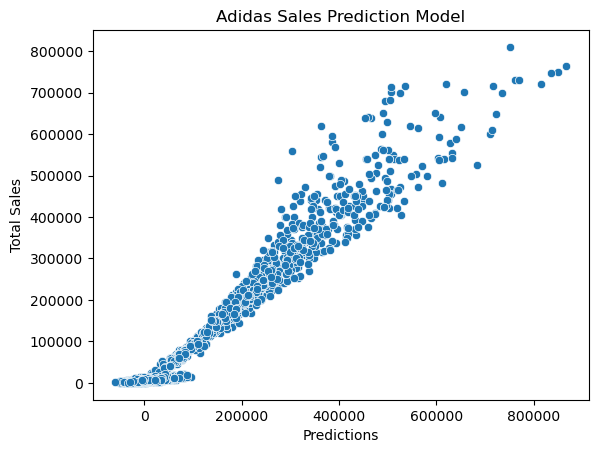

In [286]:
sns.scatterplot(x=predictions, y=y_test)
plt.xlabel("Predictions")
plt.title("Adidas Sales Prediction Model")

In [287]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [288]:
print("Mean Absolute Error: ", mean_absolute_error(y_test, predictions))
print("Mean Squared Error: ", mean_squared_error(y_test, predictions))
print("RMSE: ", math.sqrt(mean_squared_error(y_test, predictions)))

Mean Absolute Error:  19396.89835559675
Mean Squared Error:  933017579.7945117
RMSE:  30545.336465563963


In [289]:
residual = y_test - predictions

/Users/luoyihang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Total Sales', ylabel='Count'>

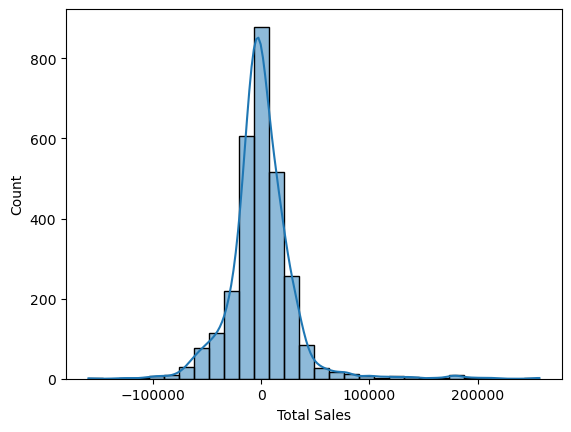

In [290]:
sns.histplot(residual, bins=30, kde=True)

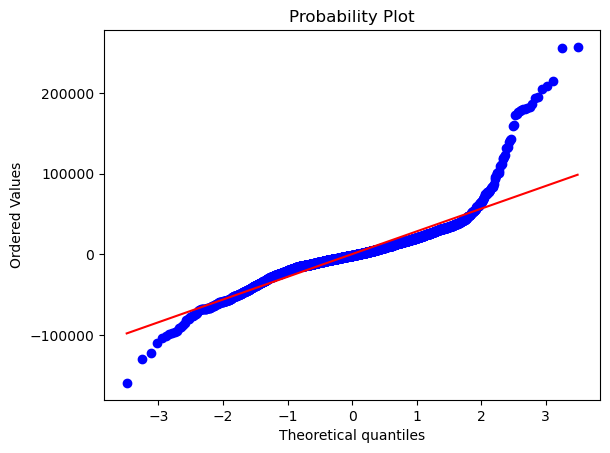

In [291]:
import pylab
import scipy.stats as stats

stats.probplot(residual, dist="norm", plot=pylab)
pylab.show()

In [292]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [293]:
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = pd.to_numeric(df[col])

In [294]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df.columns

In [296]:
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df.values, i)
                   for i in range(len(df.columns))]

print(vif_data)

             feature        VIF
0           Retailer   3.627303
1             Region   3.606114
2              State   3.722195
3               City   3.891732
4            Product   3.047143
5     Price per Unit  12.871365
6         Units Sold  16.900229
7        Total Sales  32.867197
8   Operating Profit  20.343342
9   Operating Margin  17.199105
10      Sales Method   3.814421
